<a href="https://colab.research.google.com/github/Slmeliga/Slmeliga/blob/main/British_Airways_Customer_Bookings_Data_Exploration_And_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predictive modeling of customer bookings**

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.


Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset

In [ ]:
import pandas as pd

In [ ]:
customer_bookings = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
customer_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
import seaborn as sns

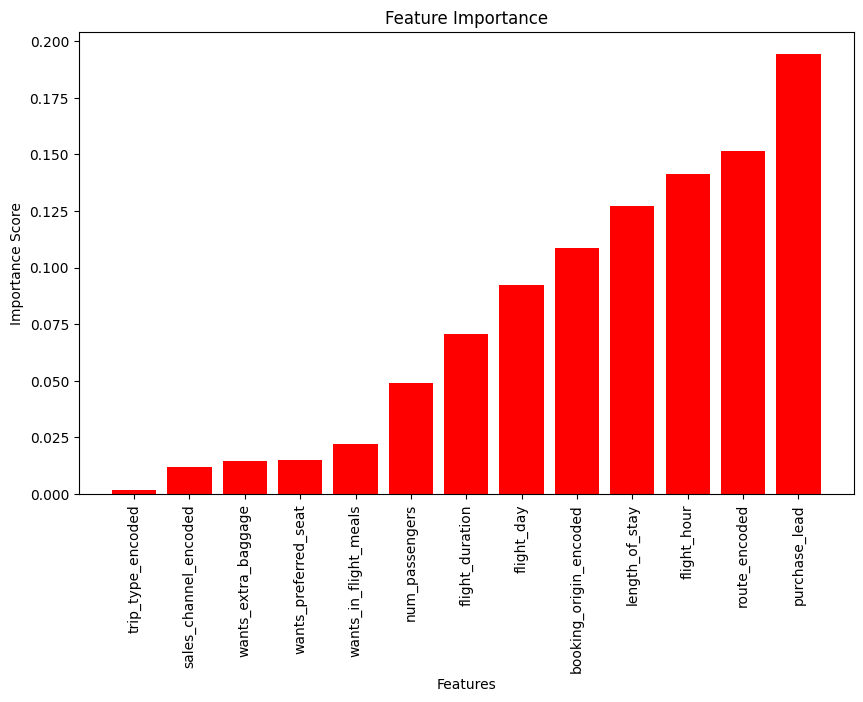

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), feature_importance[indices],
        color="r", align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
customer_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
for column in customer_bookings.columns:
    if customer_bookings[column].dtype == "object":
        print(column)

sales_channel
trip_type
flight_day
route
booking_origin


In [ ]:
customer_bookings.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
customer_bookings[cols_to_convert].dtypes

sales_channel     object
trip_type         object
flight_day        object
route             object
booking_origin    object
dtype: object

In [ ]:
print(customer_bookings.shape)

(50000, 14)


In [ ]:
customer_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

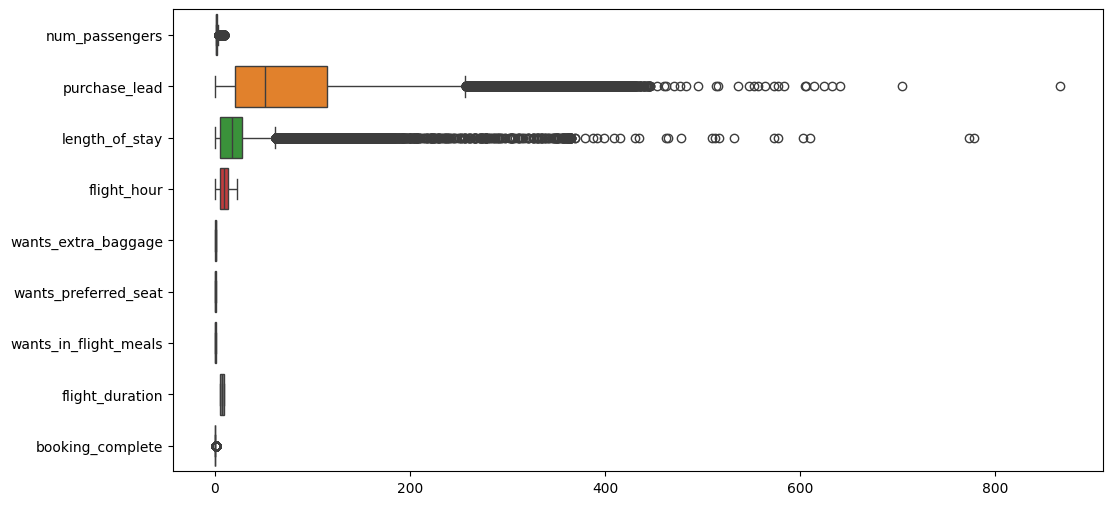

In [ ]:
# Boxplots to check for outliers

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(data=customer_bookings, ax=ax, orient='h')

plt.show()

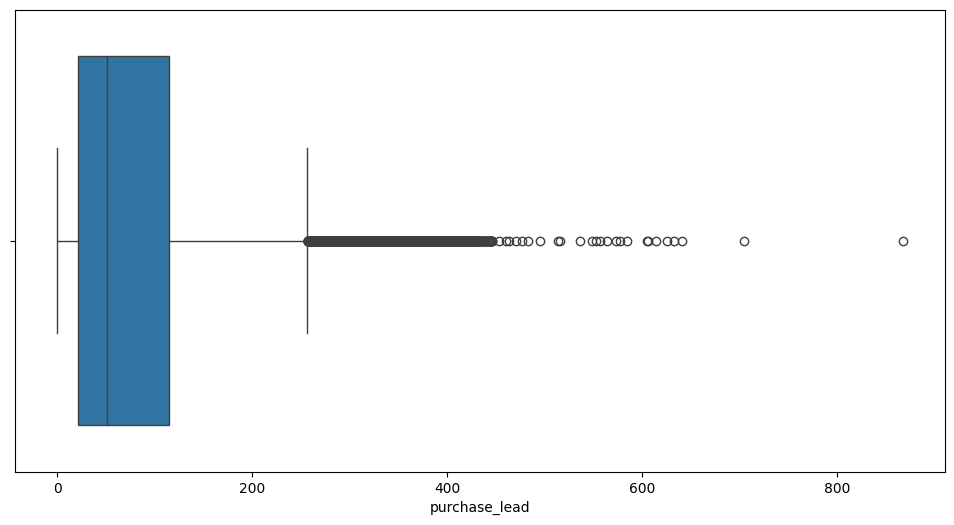

In [ ]:
# Boxplots to check for outliers

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(data=customer_bookings['purchase_lead'], ax=ax, orient='h')

plt.show()

In [ ]:
customer_bookings.loc[customer_bookings['purchase_lead'].idxmax()]

num_passengers                   3
sales_channel             Internet
trip_type                RoundTrip
purchase_lead                  867
length_of_stay                   6
flight_hour                      7
flight_day                     Mon
route                       KIXMLE
booking_origin               Japan
wants_extra_baggage              0
wants_preferred_seat             0
wants_in_flight_meals            1
flight_duration                7.0
booking_complete                 1
Name: 48259, dtype: object

array([[<Axes: title={'center': 'num_passengers'}>,
        <Axes: title={'center': 'purchase_lead'}>,
        <Axes: title={'center': 'length_of_stay'}>],
       [<Axes: title={'center': 'flight_hour'}>,
        <Axes: title={'center': 'wants_extra_baggage'}>,
        <Axes: title={'center': 'wants_preferred_seat'}>],
       [<Axes: title={'center': 'wants_in_flight_meals'}>,
        <Axes: title={'center': 'flight_duration'}>,
        <Axes: title={'center': 'booking_complete'}>]], dtype=object)

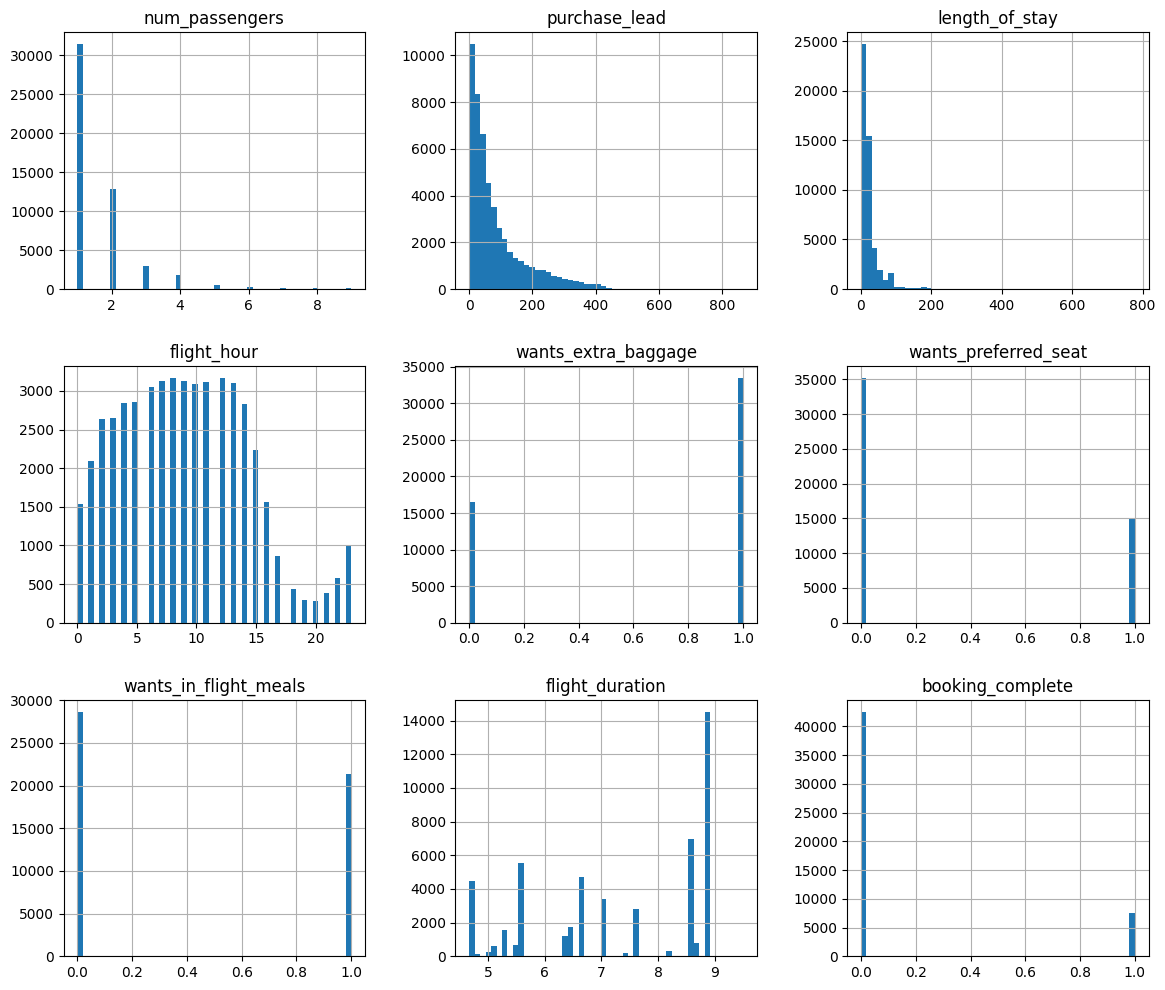

In [ ]:
# Distribution plot
customer_bookings.hist(figsize=(14, 12), bins=50)

In [ ]:
customer_bookings["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

customer_bookings["flight_day"] = customer_bookings["flight_day"].map(mapping)

In [ ]:
customer_bookings["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
customer_bookings["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
customer_bookings["booking_origin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: booking_origin
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming customer_bookings is your DataFrame
encoder = LabelEncoder()
customer_bookings["booking_origin_encoded"] = encoder.fit_transform(customer_bookings["booking_origin"])

# Displaying the encoded information
print(customer_bookings["booking_origin_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: booking_origin_encoded
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None


In [ ]:
customer_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_encoded
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,61
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,61
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,36
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,61
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,4
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,4
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,4
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,4


In [ ]:
customer_bookings['trip_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: trip_type
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
customer_bookings['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming customer_bookings is your DataFrame
encoder = LabelEncoder()
customer_bookings["trip_type_encoded"] = encoder.fit_transform(customer_bookings["trip_type"])

# Displaying the encoded information
print(customer_bookings["trip_type_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: trip_type_encoded
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None


In [ ]:
customer_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_encoded,trip_type_encoded
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,61,2
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,61,2
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,36,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,61,2
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,36,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,4,2
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,4,2
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,4,2
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,4,2


In [ ]:
customer_bookings['route'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: route
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
customer_bookings['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming customer_bookings is your DataFrame
encoder = LabelEncoder()
customer_bookings["route_encoded"] = encoder.fit_transform(customer_bookings["route"])

# Displaying the encoded information
print(customer_bookings["route_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: route_encoded
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None


In [ ]:
customer_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_encoded,trip_type_encoded,route_encoded
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,61,2,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,61,2,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,36,2,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,61,2,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,36,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,4,2,720
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,4,2,720
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,4,2,720
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,4,2,720


In [ ]:
customer_bookings['sales_channel'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: sales_channel
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
customer_bookings['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming customer_bookings is your DataFrame
encoder = LabelEncoder()
customer_bookings["sales_channel_encoded"] = encoder.fit_transform(customer_bookings["sales_channel"])

# Displaying the encoded information
print(customer_bookings["sales_channel_encoded"].info())


<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: sales_channel_encoded
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None


In [ ]:
customer_bookings

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_encoded,trip_type_encoded,route_encoded,sales_channel_encoded
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,61,2,0,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,61,2,0,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,36,2,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,61,2,0,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,36,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,4,2,720,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,4,2,720,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,4,2,720,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,4,2,720,0


In [ ]:
customer_bookings.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_encoded,trip_type_encoded,route_encoded,sales_channel_encoded
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,38.263340,1.987620,391.905800,0.112360
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,32.756539,0.129873,227.297259,0.315812
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,4.000000,2.000000,203.000000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,37.000000,2.000000,381.000000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,57.000000,2.000000,611.000000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,103.000000,2.000000,798.000000,1.000000


The .describe() method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide

chart showing the visualization of people that complete their bookings and those that did not

In [ ]:
customer_bookings =customer_bookings.drop(columns=['sales_channel','trip_type','route','booking_origin'],axis=1)

In [ ]:
customer_bookings

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_encoded,trip_type_encoded,route_encoded,sales_channel_encoded
0,2,262,19,7,6,1,0,0,5.52,0,61,2,0,0
1,1,112,20,3,6,0,0,0,5.52,0,61,2,0,0
2,2,243,22,17,3,1,1,0,5.52,0,36,2,0,0
3,1,96,31,4,6,0,0,1,5.52,0,61,2,0,0
4,2,68,22,15,3,1,0,1,5.52,0,36,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,4,2,720,0
49996,1,111,6,4,7,0,0,0,5.62,0,4,2,720,0
49997,1,24,6,22,6,0,0,1,5.62,0,4,2,720,0
49998,1,15,6,11,1,1,0,1,5.62,0,4,2,720,0


<Axes: ylabel='Frequency'>

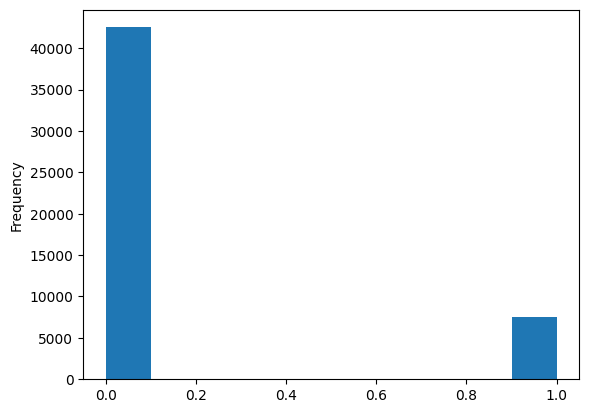

In [ ]:
customer_bookings.booking_complete.plot.hist()

In [ ]:
#number of people that completed their bookings
(customer_bookings.booking_complete==1).sum()

7478

In [ ]:
(customer_bookings.booking_complete==0).sum()

42522

In [ ]:
customer_bookings['booking_complete'].dtype

dtype('int64')

In [ ]:
customer_bookings['booking_complete'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: booking_complete
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [ ]:
customer_bookings_2 = customer_bookings.drop('booking_complete',axis=1)
customer_bookings_2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_encoded,trip_type_encoded,route_encoded,sales_channel_encoded
0,2,262,19,7,6,1,0,0,5.52,61,2,0,0
1,1,112,20,3,6,0,0,0,5.52,61,2,0,0
2,2,243,22,17,3,1,1,0,5.52,36,2,0,0
3,1,96,31,4,6,0,0,1,5.52,61,2,0,0
4,2,68,22,15,3,1,0,1,5.52,36,2,0,0


<Axes: title={'center': 'Correlated With booking_complete Column'}>

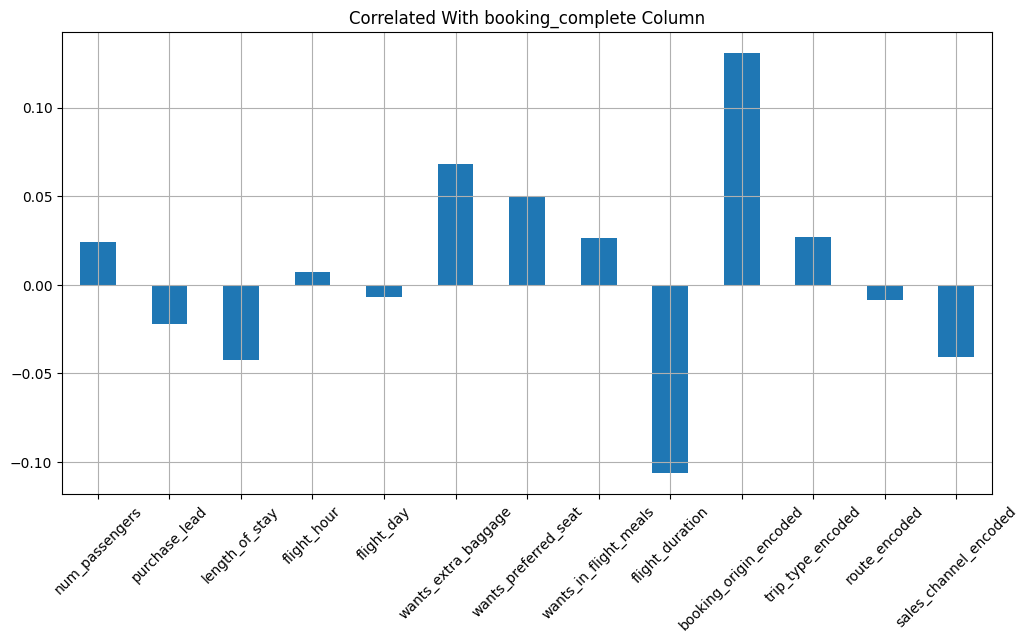

In [ ]:
customer_bookings_2.corrwith(customer_bookings['booking_complete']).plot.bar(figsize=(12,6),title='Correlated With booking_complete Column',rot=45,grid=True)

In [ ]:
corr=customer_bookings.corr()

<Axes: >

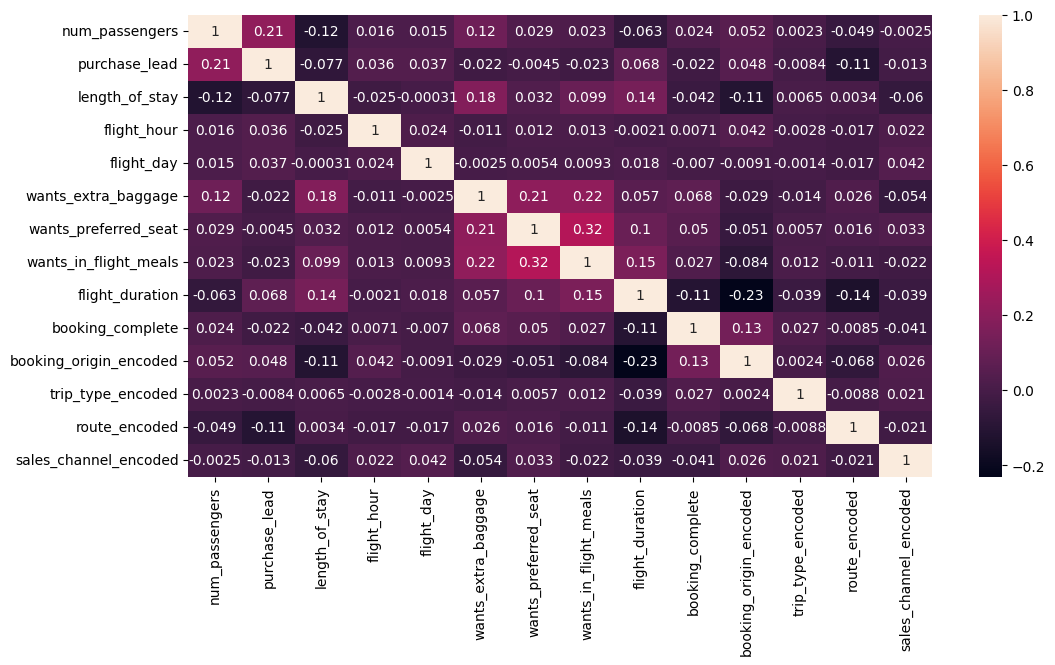

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

**Train-test-split**

In [ ]:
x=customer_bookings.drop('booking_complete',axis=1)
y=customer_bookings['booking_complete']

In [ ]:
from sklearn.model_selection import train_test_split

# Define features
x = customer_bookings.drop(['booking_complete'], axis=1)

# Define target
y = customer_bookings['booking_complete']

# Split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(40000, 13)

In [ ]:
x_test.shape

(10000, 13)

In [ ]:
y_train.shape

(40000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
x_train

array([[-0.58275091, -0.77309691, -0.53877019, ...,  0.09659849,
         0.11511238,  2.7843734 ],
       [-0.58275091,  2.36087846, -0.5685914 , ...,  0.09659849,
        -0.45636402, -0.35914723],
       [ 0.40183352,  1.27561491, -0.50894897, ...,  0.09659849,
        -0.40800833, -0.35914723],
       ...,
       [ 0.40183352,  0.24572194, -0.53877019, ...,  0.09659849,
        -0.11347818,  2.7843734 ],
       [ 2.3710024 ,  1.62998668, -0.12127319, ...,  0.09659849,
        -1.7004242 , -0.35914723],
       [-0.58275091, -0.81739338,  0.08747531, ...,  0.09659849,
         0.40964253, -0.35914723]])

In [ ]:
x_test

array([[ 0.39626331, -0.42240207, -0.5374831 , ...,  0.09035814,
         0.70957248, -0.3421532 ],
       [-0.56717776, -0.43338559,  1.75919878, ...,  0.09035814,
        -0.42943422,  2.9226674 ],
       [-0.56717776,  0.51119725, -0.08381755, ...,  0.09035814,
        -1.68763931, -0.3421532 ],
       ...,
       [ 0.39626331, -0.6420725 ,  0.14301523, ...,  0.09035814,
         1.02743482, -0.3421532 ],
       [-0.56717776, -0.91666053,  1.41894961, ...,  0.09035814,
         0.35639211, -0.3421532 ],
       [ 0.39626331, -0.26863277,  0.11466113, ...,  0.09035814,
        -0.98127856, -0.3421532 ]])

**Using RandomForestClassifier To Train The Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring function to use for hyperparameter optimization
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scoring, refit='precision', cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and evaluate on the test set
best_rf_model = grid_search.best_estimator_
test_precision = precision_score(y_test, best_rf_model.predict(x_test))
test_recall = recall_score(y_test, best_rf_model.predict(x_test))

print("Best hyperparameters:", grid_search.best_params_)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Test Precision: 0.8
Test Recall: 0.002702702702702703


**Feature Importance**

In [ ]:
# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x, y)

# Access feature importances
feature_importances = clf.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: Importance = {importance}")

Feature 0: Importance = 0.049548467624441386
Feature 1: Importance = 0.19546560094274165
Feature 2: Importance = 0.12718476006959575
Feature 3: Importance = 0.14298619897238884
Feature 4: Importance = 0.09099842264186551
Feature 5: Importance = 0.013687588717442535
Feature 6: Importance = 0.015738667356681623
Feature 7: Importance = 0.021078845190180266
Feature 8: Importance = 0.07120325760265664
Feature 9: Importance = 0.1082265506154227
Feature 10: Importance = 0.0016303839508132786
Feature 11: Importance = 0.15082758003181596
Feature 12: Importance = 0.011423676283953944


In [ ]:
# Get the number of features
num_features = len(feature_importances)
num_features

13

In [ ]:
len(feature_importances)

13

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

x=customer_bookings.drop('booking_complete',axis=1)
y=customer_bookings['booking_complete']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the testing set using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

#accuracy score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8552
